## Business case:-Create Predictive model for inventory forecasting so that service centre achieve JIT standards.

In [1]:
import mysql.connector
from mysql.connector import Error

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import csv

import warnings

warnings.filterwarnings("ignore")


### Established connection with MySql

In [3]:
connection= mysql.connector.connect(user="dm_usdata_sql",
                                    password="37z<49REb&mKnl4AV!vJ",
                                    host="18.136.157.135",
                                    port="3306",
                                    database="project_service_data"
                                   )

In [4]:
data = pd.read_sql('SELECT * FROM service_data', con=connection) ## Read the dataset

In [5]:
data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


## Domain Analysis:-

### Basic checks

In [6]:
data.head() # first 5 rows of data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [7]:
data.tail() # last 5 rows od data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL
28481,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,AIR FILTER


In [6]:
# columns
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

In [8]:
data.info()  # total no. of rows, columns, data types,etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  object
 6   invoice_line_text      28476 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


In [9]:
## here we can see the only 6 rows have null values.
## If only a small percentage of the dataset contains null values (e.g.,less than 5%),so we can drop the rows with null values. 

In [10]:
# Handling nulls
data.isnull().sum()


invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        6
dtype: int64

In [11]:
data = data[pd.notnull(data.invoice_line_text)].reset_index(drop=True)  ## null values dropped

In [12]:
data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28471,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28472,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28473,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28474,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


In [11]:
data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64

In [13]:
data.describe() ## stastitical analysis of dataset

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
count,28476,28476,28476,28476,28476,28476,28476
unique,555,553,1010,846,28,3474,503
top,01-12-18,01-12-18,venkXXXXXXXXXX,KA53EVXXXX,BAJAJ PULSAR 150,0,ENGINE OIL
freq,179,179,424,1313,8631,842,3802


In [ ]:
## top value gives the max. occurance of data.
## freq gives the total no.of occurance.
## we can see some vehical have 0 km distance driven.

#### Checking and Handling of outliers

In [15]:
## First we have convert datatypes of column

In [16]:
data['current_km_reading']=pd.to_numeric(data['current_km_reading'], errors='coerce')

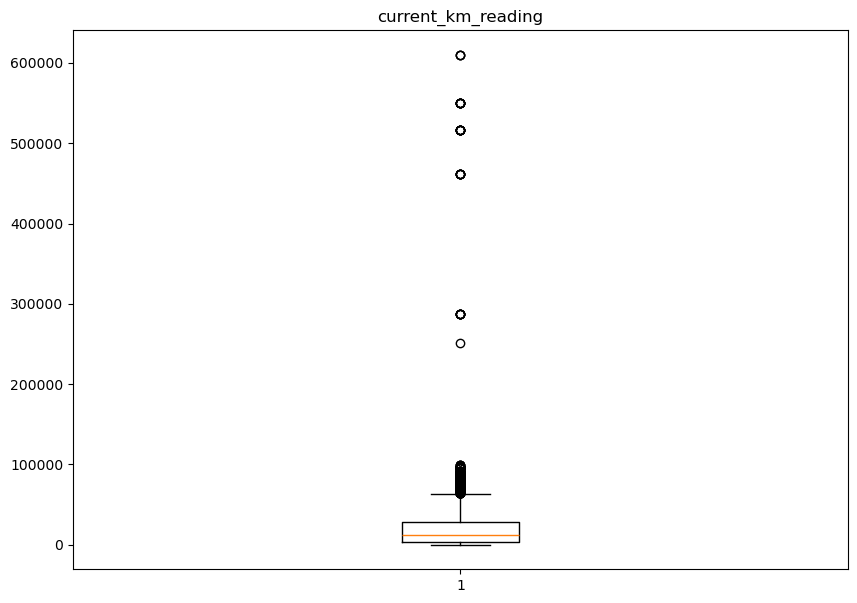

In [17]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data.current_km_reading)
plt.title("current_km_reading")
# show plot
plt.show()


### Note: Normally bikes can't exceed 100,000 km.


In [18]:
data[data.current_km_reading > 100000].shape[0]


35

In [19]:
# removing outliers
data = data[data.current_km_reading <= 100000].reset_index(drop=True)
data.shape


(28441, 7)

In [17]:
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

In [18]:
# dropping redundant columns ['invoice_date', 'business_partner_name', 'vehicle_no','current_km_reading']
data = data[['job_card_date', 'vehicle_model', 'invoice_line_text']]
data.shape


(28441, 3)

In [19]:
data

,job_card_date,vehicle_model,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,COOLANT OIL
...,...,...,...
28436,06-01-19,BAJAJ DISCOVER 125,SPROCKET RUBBER
28437,06-01-19,BAJAJ DISCOVER 125,CLUTCH CABLE
28438,06-01-19,BAJAJ DISCOVER 125,OIL FILTER
28439,06-01-19,BAJAJ DISCOVER 125,DISC OIL


In [20]:
data

,job_card_date,vehicle_model,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,COOLANT OIL
...,...,...,...
28436,06-01-19,BAJAJ DISCOVER 125,SPROCKET RUBBER
28437,06-01-19,BAJAJ DISCOVER 125,CLUTCH CABLE
28438,06-01-19,BAJAJ DISCOVER 125,OIL FILTER
28439,06-01-19,BAJAJ DISCOVER 125,DISC OIL


#### To check the total count of data of the invoice_line_text with respect to vehicle_model, we will group by these two columns

In [21]:
grouped_data = data.groupby(['vehicle_model'])['invoice_line_text'].count().reset_index()
grouped_data.rename(columns={'invoice_line_text': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data


,vehicle_model,count
12,BAJAJ PULSAR 150,8616
2,BAJAJ AVENGER STREET 220,4212
14,BAJAJ PULSAR 220,2655
13,BAJAJ PULSAR 180,2252
18,BAJAJ PULSAR NS 200,2204
5,BAJAJ CT 100,1432
7,BAJAJ DISCOVER 125,1346
0,BAJAJ AVENGER STREET,1111
11,BAJAJ PLATINA,844
23,BAJAJ V150,686


#### To check the total count of data of the vehicle_model with respect to invoive_line_text, we will group by these two columns

In [22]:
grouped_data = data.groupby(['invoice_line_text'])['vehicle_model'].count().reset_index()
grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data


,invoice_line_text,count
149,ENGINE OIL,3799
77,CHAIN LUBRICATION,3437
210,GENERAL SERVICE,2136
11,AIR FILTER,1713
3,3M OIL,1628
...,...,...
266,KICKER RUBBER,1
273,LEVER BOLT,1
274,LEVER RUBBER,1
276,LIGHT FITTING CHARGE,1


In [23]:
data['invoice_line_text'].nunique()


503

In [24]:
# printing all items from invoice_line_text
for item in data.invoice_line_text.unique():
    print(f"'{item}',")


'ENGINE OIL',
'POLISH',
'CONSUMABLES',
'COOLANT OIL',
'CHAIN LUBRICATION',
'4 WAY SWITCH',
'3M OIL',
'GENERAL SERVICE',
'OIL FILTER',
'INDICATOR',
'HEAD REST',
'VALVE GUIDE',
'TIMMING CHAIN',
'FOOT REST',
'LOW BEAM BULB',
'VALVE GRAINDING',
'DISC PAD',
'LOADING GEAR',
'PACKING KIT',
'TIMMING CHAIN PAD',
'TENSIONER',
'CLUTCH BELL REST',
'CLUTCH ASSEMBLY',
'VALVE KIT',
'SPARK PLUG',
'ONE WAY CLUTCH',
'BORE KIT',
'AIR FILTER',
'HEAD RUBBER',
'CLUTCH CABLE',
'CRANK SHAFT',
'BRAKE ADJUSTMENT',
'BRAKE SHOE',
'AIR FILTER CHECKUP',
'DRUM BOLT WASHER',
'TANK CLEANING',
'FORK BEND',
'GEAR SHAFT',
'CLUTCH COVER GASKET',
'INDICATOR BULB',
'GEAR LEVER',
'HANDLEBAR',
'CRASH GUARD',
'FORK OIL SEAL',
'FORK OIL',
'SIDE SHIELD',
'VISIOR',
'FORK CONE SET',
'HEAD LIGHT DOOM',
'TANK ASSEMBLY',
'Clutch cable',
'DISC LEVER',
'CARBURETOR CLEANING',
'SEAT COVER',
'BUZZER',
'TAIL LAMP BULB',
'DISC OIL',
'DISC OVERHUAL',
'MASTER ASSEMBLY',
'CHAIN COVER RUBBER',
'ENGINE GUARD',
'CLUTCH CAM ',
'DOOM',
'WHEEL RUBBE

### Data cleaning

In [25]:

data['invoice_line_text'] = data['invoice_line_text'].str.replace('BULB ', 'BULB')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('OVERHUAL', 'OVERHAUL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('WIELDING', 'WELDING')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ENGINE OIL TOPUP', 'ENGINE OIL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ASSEBLY', 'ASSEMBLY')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('GRIP HANDLE', 'HANDLE GRIPPER')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('HANDLEBAR', 'HANDLE BAR')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('NUMBER PLATE WITH STICKERS', 'NUMBER PLATE')


In [26]:
service_related_tokens = [
'OVERHAUL', 
'WELDING',
'SERVICE', 
'WORK',
'PUNCHER',
'REBORE',
'DENT',
'RC CARD',
'TAX',
'ENGINE WORK',
'CHECK',
'LABOUR',
'CHARGE',
'FEES',
'PAYMENT',
'STICKERS'
'ADJUSTMENT',
'REGISTOR',
'INSURANCE',
'ADJUSTMENT',
'REMOVAL', 
'THREADING', 
'CLEANING',
]
services = []
for item in data.invoice_line_text.unique():
    try:
        if sum([item.find(token)!= -1 for token in service_related_tokens]) > 0:
            services.append(item)
    except:
        print(item)
        
need_to_be_removed_in_services = [
'PETROL',
'VALVE GRAINDING',
'CHAIN LUBRICATION',
'ENGINE RE CONDITION',
'HEAD LIGHT WIRING',
'EX SHOW ROOM'
]
services.extend(need_to_be_removed_in_services)


In [27]:
len(services)

67

In [28]:
for item in data.invoice_line_text.unique():
    if item not in services:
        print(item)


ENGINE OIL
POLISH
CONSUMABLES
COOLANT OIL
4 WAY SWITCH
3M OIL
OIL FILTER
INDICATOR
HEAD REST
VALVE GUIDE
TIMMING CHAIN
FOOT REST
LOW BEAM BULB
DISC PAD
LOADING GEAR
PACKING KIT
TIMMING CHAIN PAD
TENSIONER
CLUTCH BELL REST
CLUTCH ASSEMBLY
VALVE KIT
SPARK PLUG
ONE WAY CLUTCH
BORE KIT
AIR FILTER
HEAD RUBBER
CLUTCH CABLE
CRANK SHAFT
BRAKE SHOE
DRUM BOLT WASHER
FORK BEND
GEAR SHAFT
CLUTCH COVER GASKET
INDICATOR BULB
GEAR LEVER
HANDLE BAR
CRASH GUARD
FORK OIL SEAL
FORK OIL
SIDE SHIELD
VISIOR
FORK CONE SET
HEAD LIGHT DOOM
TANK ASSEMBLY
Clutch cable
DISC LEVER
SEAT COVER
BUZZER
TAIL LAMP BULB
DISC OIL
MASTER ASSEMBLY
CHAIN COVER RUBBER
ENGINE GUARD
CLUTCH CAM 
DOOM
WHEEL RUBBER
bore kit
ENGINE BEARING
CRANK RESET
CARBURETOR DIAPHRAGM RUBBER
CLUTCH LEVER
DRUM BOLT
LOCK SET
RIGHT SHIELD CAP
SWITCH
SHOCK ABSORBER
STEP HOLDER
ACCELATOR CABLE
JALL SCREW
TANK COVER
HANDLE LOCK
GRIPPER
PARKING BULB
WIND SHIELD
SPEEDOMETER CAP
HEAD LIGHT STAY
CONE SET
DOOM SCREW KIT
DISK PAD
HEAD LIGHT BULB
CALIPER AS

In [29]:
# dropping rows related to services
data = data[~data.invoice_line_text.isin(services)]
data = data.reset_index(drop=True)
data.shape


(21326, 3)

In [30]:
data

,job_card_date,vehicle_model,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,COOLANT OIL
...,...,...,...
21321,06-01-19,BAJAJ DISCOVER 125,SPROCKET RUBBER
21322,06-01-19,BAJAJ DISCOVER 125,CLUTCH CABLE
21323,06-01-19,BAJAJ DISCOVER 125,OIL FILTER
21324,06-01-19,BAJAJ DISCOVER 125,DISC OIL


In [31]:
# renaming some columns
data.rename(columns={"job_card_date":"date", "invoice_line_text":"spare_part"}, inplace=True)

In [32]:
data['date'] = pd.to_datetime(data['date'])

In [33]:
data.head()

,date,vehicle_model,spare_part
0,2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
1,2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2,2017-05-31,BAJAJ PULSAR NS 200,POLISH
3,2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
4,2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL


In [34]:
# Calculate the counts of unique elements of invoice_line_text
value_counts = data['spare_part'].value_counts()


In [35]:
value_counts

spare_part
ENGINE OIL              3804
AIR FILTER              1713
3M OIL                  1628
CONSUMABLES             1595
POLISH                  1245
                        ... 
REGISTER EXPENSES          1
SWITCH                     1
MAGNET COVER PACKING       1
CLUTCH OUTLET PIPE         1
HELMET                     1
Name: count, Length: 432, dtype: int64

## EDA

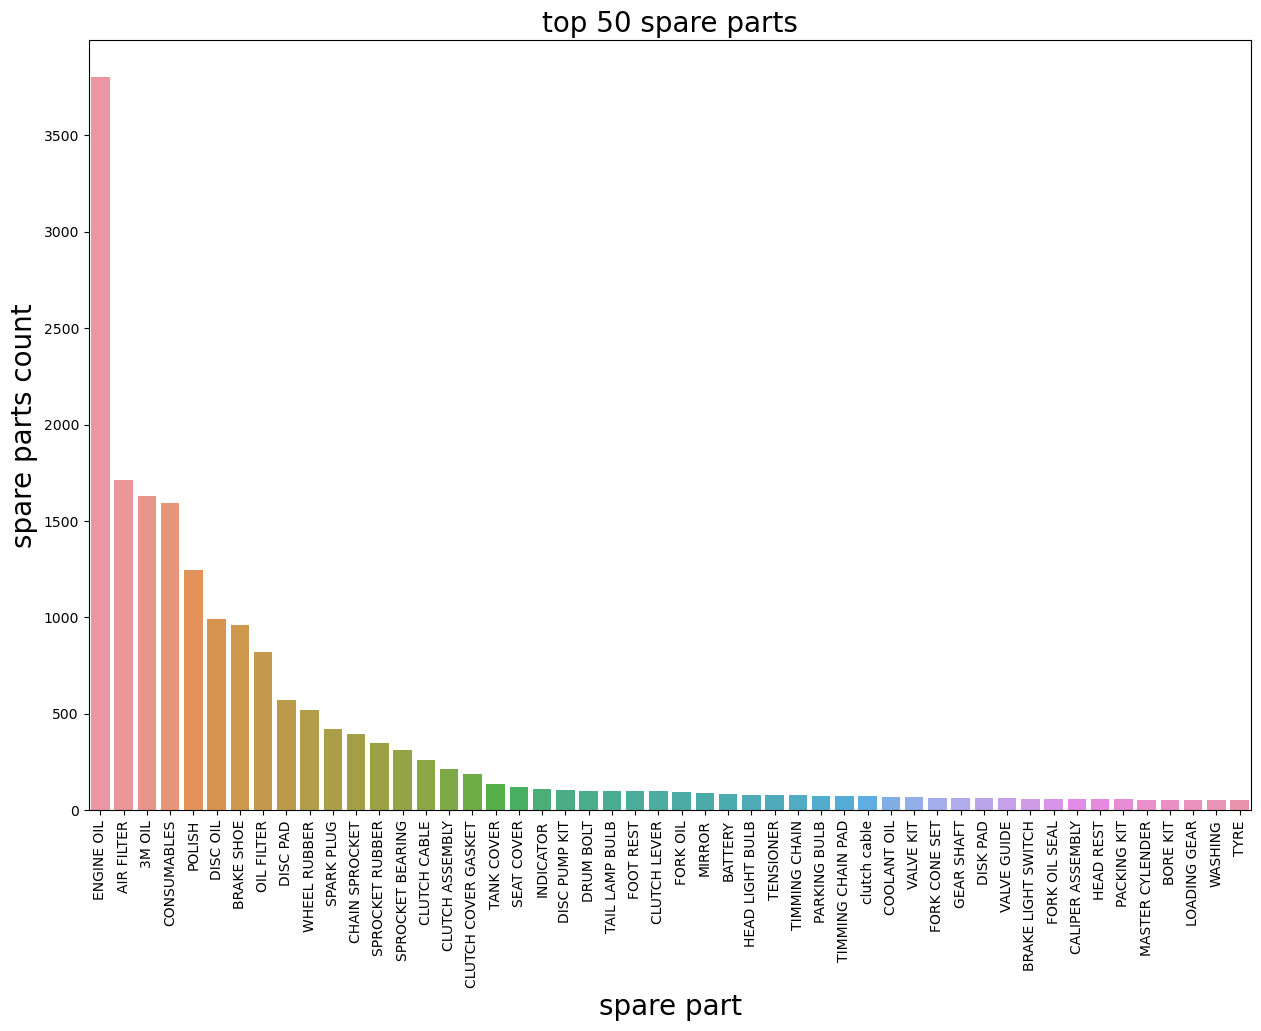

In [36]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(data=data, x='spare_part',
              order=data['spare_part'].value_counts().index[:50],
              ax=ax)

# Set titles and labels with customized fontsizes
ax.set_title('top 50 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

In [37]:
# grouping by vehicle_model

vm_grouped_data = data.groupby(['vehicle_model'])['spare_part'].count().reset_index()
vm_grouped_data.rename(columns={'spare_part': 'count'}, inplace=True)
vm_grouped_data = vm_grouped_data.sort_values(by='count', ascending=False)
vm_grouped_data

,vehicle_model,count
12,BAJAJ PULSAR 150,6497
2,BAJAJ AVENGER STREET 220,3058
14,BAJAJ PULSAR 220,1985
18,BAJAJ PULSAR NS 200,1706
13,BAJAJ PULSAR 180,1704
5,BAJAJ CT 100,1119
7,BAJAJ DISCOVER 125,1028
0,BAJAJ AVENGER STREET,767
11,BAJAJ PLATINA,662
23,BAJAJ V150,524


In [38]:
# grouping by spare part
sp_grouped_data = data.groupby(['spare_part'])['vehicle_model'].count().reset_index()
sp_grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
sp_grouped_data = sp_grouped_data.sort_values(by='count', ascending=False)
sp_grouped_data


,spare_part,count
128,ENGINE OIL,3804
10,AIR FILTER,1713
3,3M OIL,1628
91,CONSUMABLES,1595
299,POLISH,1245
...,...,...
233,LEVER BOLT,1
234,LEVER RUBBER,1
237,LIGHTING COIL,1
244,MAGNET ASSEMBLY,1


In [39]:
data.date.nunique()

553

In [40]:
data.isnull().sum()

date             0
vehicle_model    0
spare_part       0
dtype: int64

In [41]:
sp_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 128 to 431
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   spare_part  432 non-null    object
 1   count       432 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [42]:
sp_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 128 to 431
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   spare_part  432 non-null    object
 1   count       432 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [43]:
sp_grouped_data.shape[0]

432

In [44]:
sp_grouped_data[sp_grouped_data['count']>1].shape[0]

289

In [45]:
sp_grouped_data[sp_grouped_data['count']>10].shape[0]

129

In [46]:
sp_grouped_data[sp_grouped_data['count']>=100].shape[0]

23

In [47]:
# setting date as index column
data_indexed = data.set_index('date')
data_indexed.head()

,vehicle_model,spare_part
date,,
2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2017-05-31,BAJAJ PULSAR NS 200,POLISH
2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL


In [197]:
# resampling
data = data_indexed[['spare_part']].resample('D').count()

In [198]:
data

,spare_part
date,
2017-01-06,34
2017-01-07,62
2017-01-08,32
2017-01-09,82
2017-01-10,14
...,...
2019-05-28,0
2019-05-29,0
2019-05-30,0


<Figure size 1500x1000 with 0 Axes>

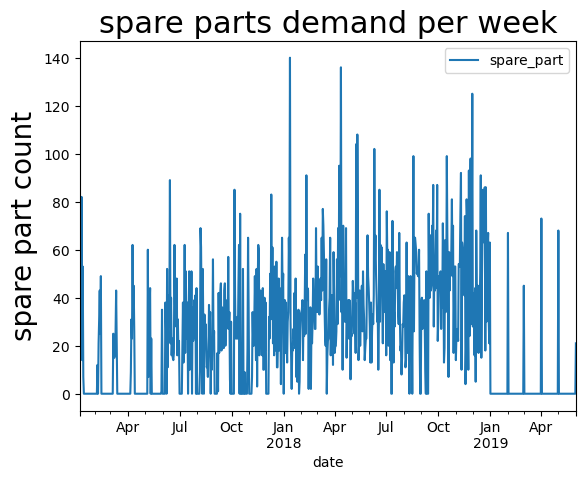

In [199]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the weekly data 
data.plot()

# Set the title and labels with customized fontsizes
plt.title('spare parts demand per Day', fontsize=22)
plt.ylabel('spare part count', fontsize=20)

# Show the plot
plt.show()

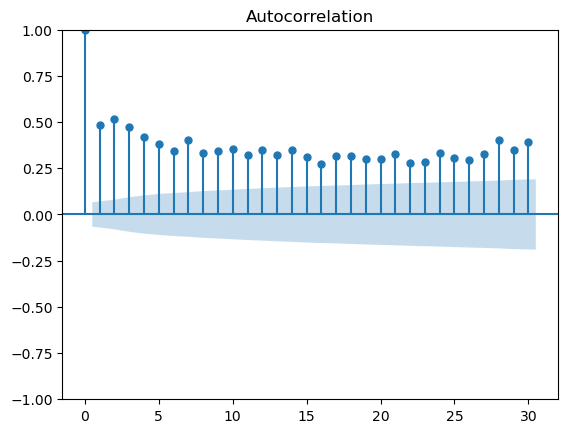

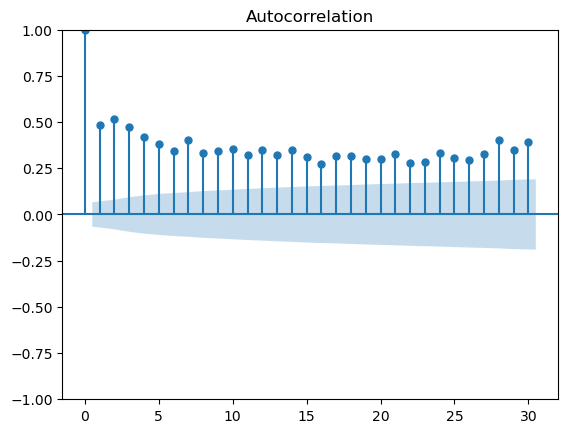

In [200]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)


From the autocorrelation plot, it is clear that given series is not stationary.

We can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [201]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.spare_part, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.97625101858824
2. P-Value :  0.03717256822885033
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 859
5. Critical Values :
	 1% :  -3.437985563419411
	 5% :  -2.864910527649228
	 10% :  -2.5685647265209433


#### P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary.

In [202]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply,
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [203]:
data.head()

,spare_part
date,
2017-01-06,34
2017-01-07,62
2017-01-08,32
2017-01-09,82
2017-01-10,14


In [204]:
data1.head() # Series integrated to the order of 1

,spare_part
date,
2017-01-06,NaN
2017-01-07,28.0
2017-01-08,-30.0
2017-01-09,50.0
2017-01-10,-68.0


In [205]:
data1=data1.iloc[1:] #null value discarded
data1

,spare_part
date,
2017-01-07,28.0
2017-01-08,-30.0
2017-01-09,50.0
2017-01-10,-68.0
2017-01-11,39.0
...,...
2019-05-28,0.0
2019-05-29,0.0
2019-05-30,0.0


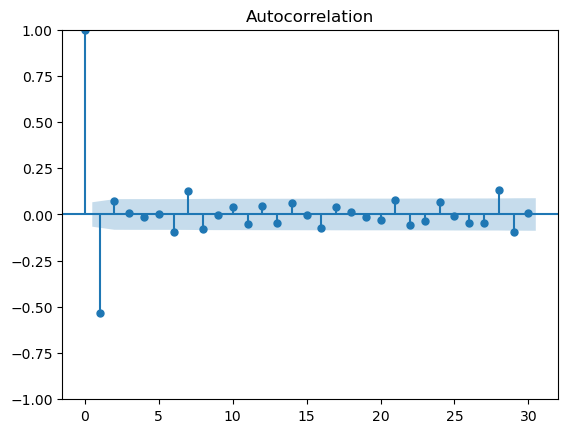

In [206]:
plot_acf(data1); # autocorrelation plot

In [207]:
data2=data1.diff(periods=1) # differencing applied to data1

In [208]:
data2.head()

,spare_part
date,
2017-01-07,NaN
2017-01-08,-58.0
2017-01-09,80.0
2017-01-10,-118.0
2017-01-11,107.0


In [209]:
data2=data2.iloc[1:] # integrated to the order of 2

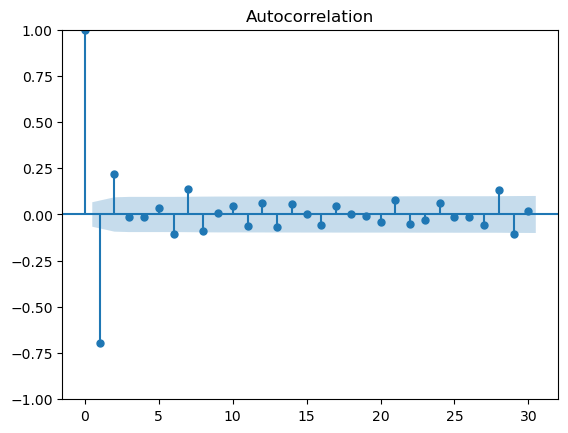

In [210]:
plot_acf(data2);

In [211]:
data2.shape

(875, 1)

In [212]:
data3=data2.diff(periods=1) # differencing applied to data2

In [213]:
data3.head()

,spare_part
date,
2017-01-08,NaN
2017-01-09,138.0
2017-01-10,-198.0
2017-01-11,225.0
2017-01-12,-192.0


In [214]:
data3=data2.iloc[1:] # integrated to the order of 3

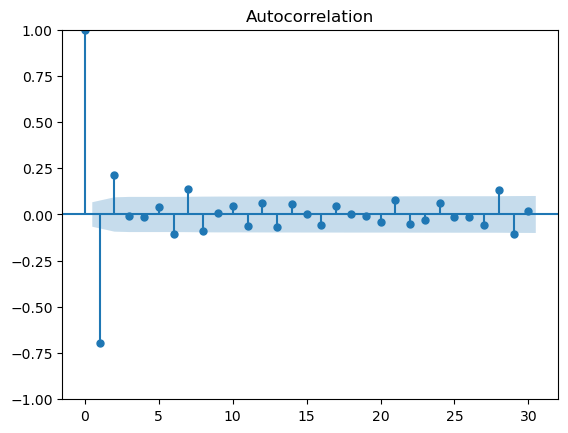

In [215]:
plot_acf(data3);

In [216]:
data3.shape

(874, 1)

In [217]:
data4=data3.diff(periods=1) # differencing applied to data3

In [218]:
data4.head()

,spare_part
date,
2017-01-09,NaN
2017-01-10,-198.0
2017-01-11,225.0
2017-01-12,-192.0
2017-01-13,124.0


In [219]:
data4=data3.iloc[1:] # integrated to the order of 3

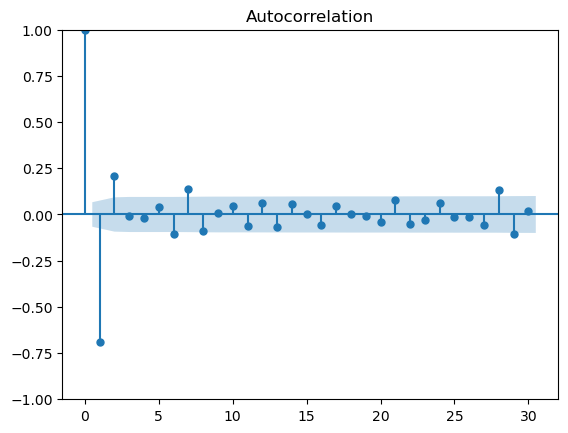

In [220]:
plot_acf(data4);

In [221]:
data4.shape

(873, 1)

In [285]:
from sklearn.preprocessing import MinMaxScaler

In [286]:
sc=MinMaxScaler()
data_Scaled = sc.fit_transform(data4)

In [287]:
data_Scaled

array([[0.24332344],
       [0.91097923],
       [0.34124629],
       [0.70919881],
       [0.61424332],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.62908012],
       [0.52225519],
       [0.69139466],
       [0.56083086],
       [0.59940653],
       [0.50445104],
       [0.71810089],
       [0.3768546 ],
       [0.7388724 ],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.59347181],
       [0.593

In [288]:
data=pd.DataFrame(data_Scaled,columns=data.columns)

In [289]:
## Creating training and test sets
train=data[:698] #from 0th row to 96th row - traning data
test=data[698:] #from 96th row to end - testing data

In [290]:
train

,spare_part
0,0.243323
1,0.910979
2,0.341246
3,0.709199
4,0.614243
...,...
693,0.480712
694,0.753709
695,0.394659
696,0.896142


In [291]:
test

,spare_part
698,0.635015
699,0.682493
700,0.459941
701,0.744807
702,0.510386
...,...
868,0.593472
869,0.593472
870,0.593472
871,0.593472


In [292]:
train.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   spare_part  698 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [188]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg


In [293]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data,maxlag=17,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [294]:
## model creation
ar_model=AutoReg(train,lags=[1,2,3,4,5,6,7,8,9,19,11,12,13,14]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [295]:
##making prediction
prediction=ar_model_fit.predict(start=698, end=873)

In [296]:
prediction.head()

698    0.657471
699    0.614352
700    0.558800
701    0.632192
702    0.566520
dtype: float64

In [297]:
test.head()

,spare_part
698,0.635015
699,0.682493
700,0.459941
701,0.744807
702,0.510386


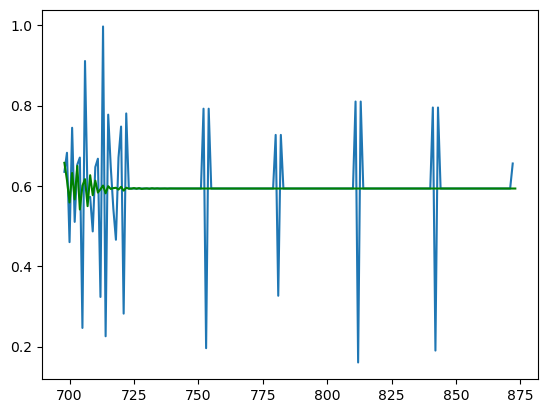

In [298]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

## ARIMA MODEL

In [299]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [300]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(2,2,1))#order=p,d,q

model_arima_fit = model_arima.fit()#training

In [302]:
## evaluate the model
print(model_arima_fit.aic)
#no range or no limit for this aic

-863.1370361078898


In [303]:
## predicting the output of sample points
predictions = model_arima_fit.forecast(steps=9)# first 9 
#records to make prediction

In [304]:
predictions

698    0.726671
699    0.581333
700    0.513666
701    0.689143
702    0.511909
703    0.624372
704    0.594337
705    0.561909
706    0.621364
Name: predicted_mean, dtype: float64

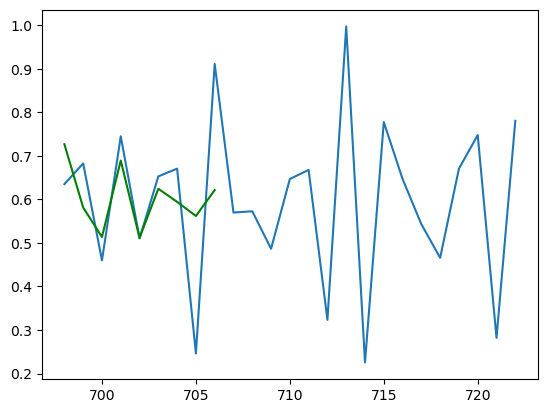

In [305]:
plt.plot(test[:25])
plt.plot(predictions,color='green')

In [306]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [307]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) -763.6827410681962
(0, 0, 1) -1533.6954013235097
(0, 0, 2) -1858.8446469844303


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 3) -1853.9568282450844


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 4) -1868.1157567025389
(0, 1, 0) 83.90616981375382
(0, 1, 1) -755.0349407862402
(0, 1, 2) -1516.9068049423968
(0, 1, 3) -1825.377604000529
(0, 1, 4) -1830.740802812883
(0, 2, 0) 958.7866296775404
(0, 2, 1) 93.33510916659182
(0, 2, 2) -738.5281689282405
(0, 2, 3) -1491.5262628248533


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 2, 4) -1795.9692185097676
(0, 3, 0) 1847.5356618703584
(0, 3, 1) 966.9482009070575
(0, 3, 2) 108.42656964150336
(0, 3, 3) -716.7925897287089


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 3, 4) -1393.6899516326393
(0, 4, 0) 2745.257808909413
(0, 4, 1) 1854.4231896515093
(0, 4, 2) 980.7740432138878
(0, 4, 3) 128.5973346339947


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 4, 4) -577.8160232145278
(1, 0, 0) -1228.6928731212874


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1) -1753.0092006079667
(1, 0, 2) -1733.0469135827138


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 3) -1831.1680798886632


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 4) -1860.8738838593968
(1, 1, 0) -539.8507687920184
(1, 1, 1) -1218.3114016230884
(1, 1, 2) -1742.29688339611
(1, 1, 3) -1554.3231365280487
(1, 1, 4) -1837.9740086947593
(1, 2, 0) 211.7815654782283
(1, 2, 1) -528.3742765716867
(1, 2, 2) -1199.4591940627083


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 2, 3) -1522.7350003594968
(1, 2, 4) -1485.2620945989029
(1, 3, 0) 998.2510660201965
(1, 3, 1) 222.23062901353308


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 3, 2) -510.6898877018572
(1, 3, 3) -1175.0652612288668


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 3, 4) -707.3613154337486
(1, 4, 0) 1808.1963232995138
(1, 4, 1) 1007.6030041924978
(1, 4, 2) 238.4570277933015
(1, 4, 3) -488.203221454594


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 4, 4) -998.6348443441445
(2, 0, 0) -1441.9883327536659


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1) -1808.4300401657356


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2) -1769.5653997466356


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 3) -1732.7568651004408
(2, 0, 4) -1788.9263751392418
(2, 1, 0) -876.0605912981414
(2, 1, 1) -1430.4678629903588
(2, 1, 2) -1796.2907213064263


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 3) -1739.378691694562


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 4) -1849.0728018349826
(2, 2, 0) -224.4172936239949
(2, 2, 1) -863.1370361078898


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 2) -1409.4203571224107


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 3) -1734.8516802964207
(2, 2, 4) -1516.0048247784503
(2, 3, 0) 472.2472320465947
(2, 3, 1) -212.28284852195446
(2, 3, 2) -843.9611985025806


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3) -1376.8945990180118
(2, 3, 4) -1172.428653574251
(2, 4, 0) 1198.2758357926782
(2, 4, 1) 483.54610070040394
(2, 4, 2) -193.94872747589434
(2, 4, 3) -818.9304901079142
(2, 4, 4) -485.9021236656826
(3, 0, 0) -1553.1499897461204


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 1) -1819.6221097599212
(3, 0, 2) -1790.99777282732
(3, 0, 3) -1774.1057624516486


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 4) -1779.7720234078838
(3, 1, 0) -1082.7823280884008


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 1) -1540.8117193221178


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 2) -1436.2104402719456
(3, 1, 3) -1793.238483626803


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 4) -1753.953001901716
(3, 2, 0) -497.76918882875486


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 1) -1068.7236322560839
(3, 2, 2) -1436.603475156694
(3, 2, 3) -1402.2228813565212


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 4) -1701.9276334306278
(3, 3, 0) 149.1240363663372
(3, 3, 1) -484.3529441703789
(3, 3, 2) -1047.0285859112985
(3, 3, 3) -838.1355020335259
(3, 3, 4) -1169.5921002382624
(3, 4, 0) 830.2478751681895
(3, 4, 1) 161.74537680691205
(3, 4, 2) -464.15673989226593


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 3) -950.4891209229538


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 4) -669.2573514730641
(4, 0, 0) -1615.9108900921924
(4, 0, 1) -1780.0668941092017
(4, 0, 2) -1527.1453922642106
(4, 0, 3) -1773.417082888369
(4, 0, 4) -1779.8502334640898
(4, 1, 0) -1252.2529439050895


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 1) -1602.9565732404558


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 2) -1609.5430899055104


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 3) -1798.4576384852517


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 4) -1787.9674112596713
(4, 2, 0) -766.5255923576901


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 1) -1237.169820154146


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 2) -1577.6631061026196
(4, 2, 3) -1516.2942361532464


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 4) -1405.0424195220257
(4, 3, 0) -191.24139357467868


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 1) -751.8004940620283


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 2) -1211.2290419742376


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 3) -1046.5673418841668


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 4) -1476.7212596163392
(4, 4, 0) 444.00720118641317


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 1) -177.12177541550773


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 2) -729.7265260152917


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 3) -1187.3338429075243
(4, 4, 4) -1015.0045015913045


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [308]:
min(list2)  # lowest aic score

-1868.1157567025389

In [309]:
list2.index(min(list2))

4

In [310]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
list1[loc]

(0, 0, 4)

In [318]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(data, order=(0,0,4))

model_arima_fit = model_arima.fit() #training

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [339]:
forecast = model_arima_fit.forecast(steps=25)
forecast

873    0.484134
874    0.654719
875    0.577955
876    0.597355
877    0.593546
878    0.593546
879    0.593546
880    0.593546
881    0.593546
882    0.593546
883    0.593546
884    0.593546
885    0.593546
886    0.593546
887    0.593546
888    0.593546
889    0.593546
890    0.593546
891    0.593546
892    0.593546
893    0.593546
894    0.593546
895    0.593546
896    0.593546
897    0.593546
Name: predicted_mean, dtype: float64

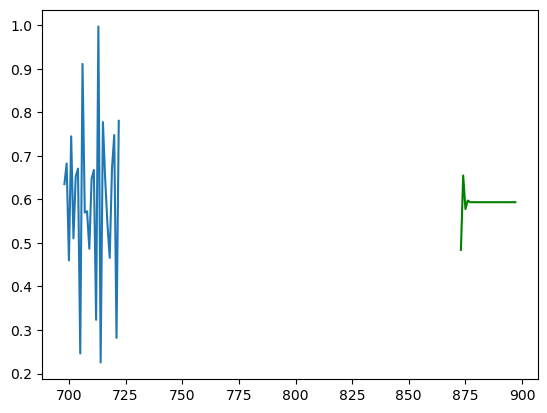

In [340]:
plt.plot(forecast,color='green')
plt.plot(test[:25])

In [341]:
forecast2 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([0.63501484, 0.68249258, 0.45994065, 0.74480712, 0.51038576,
       0.65281899, 0.67062315, 0.2462908 , 0.91097923, 0.56973294,
       0.5727003 , 0.48664688, 0.64688427, 0.66765579, 0.32344214,
       0.99703264, 0.22551929, 0.77744807, 0.64688427, 0.54302671,
       0.46587537, 0.67062315, 0.74777448, 0.28189911, 0.78041543])

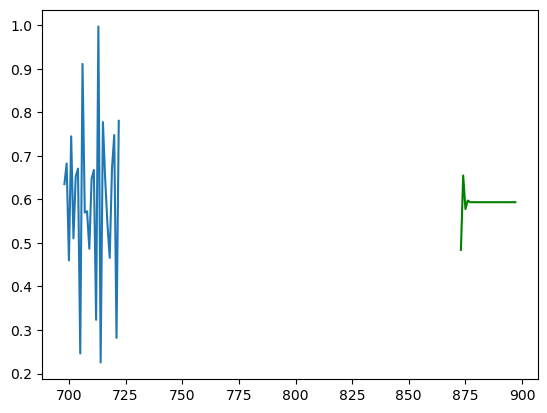

In [342]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast2,color='green') #line plot for prediction

In [343]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print('RMSE',rmse(test1, forecast2))

# Calculate mean squared error
print('MSE',mean_squared_error(test1, forecast2))

print('MAE',mean_absolute_error(test1,forecast2))


RMSE 0.19038712848273126
MSE 0.03624725869190002
MAE 0.15176779625041187
